### Importing libraries.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score, mean_squared_error

### Importing CSV file. 

In [3]:
data=pd.read_csv('Currus.csv')
data.head()

,dateCrawled,mtor_name,vendor,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,reg_month,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30-03-2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30-03-2016 00:00,20257,07-04-2016 04:44
1,07-03-2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07-03-2016 00:00,88045,26-03-2016 13:17
2,01-04-2016 00:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31-03-2016 00:00,27449,01-04-2016 08:40
3,19-03-2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19-03-2016 00:00,34537,07-04-2016 04:44
4,16-03-2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16-03-2016 00:00,55270,01-04-2016 23:18


### No. of rows and column.

In [3]:
data.shape

(50001, 19)

### Columns are in data set.

In [4]:
data.columns

Index(['dateCrawled', 'mtor_name', 'vendor', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'reg_month', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

### * No of total Null value in data set.
### * And total No. of Null value in each column.

In [5]:
print(data.isnull().sum().sum())
data.isnull().sum()

24989


dateCrawled              0
mtor_name                0
vendor                   0
offerType                0
price                    0
abtest                   0
vehicleType           5188
yearOfRegistration       0
gearbox               2824
powerPS                  0
model                 2758
kilometer                0
reg_month                0
fuelType              4503
brand                    0
notRepairedDamage     9716
dateCreated              0
postalCode               0
lastSeen                 0
dtype: int64

### Total No. of value in each category of vehicleType column.

In [6]:
data['vehicleType'].value_counts()

limousine        13041
small car        10744
station wagon     8990
bus               3995
cabrio            3056
coupe             2536
suv               2011
others             440
Name: vehicleType, dtype: int64

### We have replace the Null values of vehicleType column by groupby brand of vehicleType to its mode value.

In [4]:
data['vehicleType']=data.groupby('brand')['vehicleType'].apply(lambda x:x.fillna(x.mode()[0]))

### Total No. of value in each category of gearbox column.

In [5]:
data['gearbox'].value_counts()

manual       36732
automatic    10445
Name: gearbox, dtype: int64

### We have replace the Null values of gearbox column by groupby brand of gearbox to its mode value.

In [6]:
data['gearbox']=data.groupby('brand')['gearbox'].apply(lambda x:x.fillna(x.mode()[0]))

### Total No. of value in each category of fuelType column.

In [7]:
data['fuelType'].value_counts()

petrol     30214
diesel     14347
lpg          778
cng           80
hybrid        39
other         26
electro       14
Name: fuelType, dtype: int64

### We have replace the Null values of fuelType column by groupby brand of fuelType to its mode value.

In [8]:
data['fuelType']=data.groupby('brand')['fuelType'].apply(lambda x:x.fillna(x.mode()[0]))

### Total No. of value in each category of notRepairedDamage column.

In [9]:
data['notRepairedDamage'].value_counts()

no     35337
yes     4948
Name: notRepairedDamage, dtype: int64

### As we found the value count of notRepairedDamage vehicle is higher on "no" so we replace the NaN with "no"

In [10]:
data['notRepairedDamage']=data['notRepairedDamage'].fillna(value='no')

In [11]:
data.isnull().sum()

dateCrawled              0
mtor_name                0
vendor                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                 2758
kilometer                0
reg_month                0
fuelType                 0
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
dtype: int64

### As Model have small amount of data which can be neglect so we drop all the model row whch have null values .

In [12]:
data.dropna(inplace=True)

### Now updated null value in data set is:

In [13]:
data.isnull().sum().sum()

0

### Now updated shape of data set is:

In [14]:
data.shape

(47243, 19)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47243 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled           47243 non-null object
mtor_name             47243 non-null object
vendor                47243 non-null object
offerType             47243 non-null object
price                 47243 non-null int64
abtest                47243 non-null object
vehicleType           47243 non-null object
yearOfRegistration    47243 non-null int64
gearbox               47243 non-null object
powerPS               47243 non-null int64
model                 47243 non-null object
kilometer             47243 non-null int64
reg_month             47243 non-null int64
fuelType              47243 non-null object
brand                 47243 non-null object
notRepairedDamage     47243 non-null object
dateCreated           47243 non-null object
postalCode            47243 non-null int64
lastSeen              47243 non-null object
dtypes: int64(6), object(13)
memory usage: 7.2+ MB


In [19]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,reg_month,postalCode
count,4.724300e+04,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000
mean,6.360156e+03,2004.609572,117.713524,125956.437991,5.834854,50956.160384
std,7.397599e+04,85.708928,228.352072,39599.597394,3.673942,25726.052858
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.200000e+03,1999.000000,75.000000,125000.000000,3.000000,30855.000000
50%,3.000000e+03,2004.000000,109.000000,150000.000000,6.000000,49681.000000
75%,7.300000e+03,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [20]:
print(data['price'].min())
print(data['price'].max())

0
12345678


In [16]:
data['powerPS']=data.groupby('brand')['powerPS'].apply(lambda x:x.replace(range(0,40),x.mean()))

In [17]:
data['yearOfRegistration']=data['yearOfRegistration'].replace(range(1000,1900),data['yearOfRegistration'].mean())

In [18]:
data['yearOfRegistration']=data['yearOfRegistration'].replace(range(2020,10000),data['yearOfRegistration'].mean())
data['yearOfRegistration'].max()

2019.0

In [19]:
data['price']=data['price'].replace(9999999,data['price'].mean())
data['price']=data['price'].replace(12345678,data['price'].mean())
data['price']=data['price'].replace(range(10010011,10000),data['price'].mean())


In [20]:
data['reg_month']=data['reg_month'].replace(0,3)

In [21]:
data.drop(["dateCrawled","vendor","offerType","abtest","lastSeen","dateCreated"],axis="columns", inplace= True)

In [22]:
data.shape

(47243, 13)

In [23]:
data

,mtor_name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,reg_month,fuelType,brand,notRepairedDamage,postalCode
0,Zu_verkaufen,4450.0,limousine,2003.0,manual,150.000000,3er,150000,3,diesel,bmw,no,20257
1,Volvo_XC90_2.4D_Summum,13299.0,suv,2005.0,manual,163.000000,xc_reihe,150000,6,diesel,volvo,no,88045
2,Volkswagen_Touran,3200.0,bus,2003.0,manual,101.000000,touran,150000,11,diesel,volkswagen,no,27449
3,Seat_Ibiza_1.4_16V_Reference,4500.0,small car,2006.0,manual,86.000000,ibiza,60000,12,petrol,seat,no,34537
4,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,18750.0,suv,2008.0,automatic,185.000000,xc_reihe,150000,11,diesel,volvo,no,55270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,Suche_VW_T5_Multivan,0.0,bus,2005.0,manual,99.457163,transporter,150000,3,petrol,volkswagen,no,29690
49997,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,19999.0,limousine,1990.0,manual,99.457163,golf,5000,3,petrol,volkswagen,no,50181
49998,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,0.0,coupe,2004.0,manual,171.687524,3er,150000,1,petrol,bmw,no,86956
49999,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,100.0,station wagon,2000.0,manual,76.431655,megane,150000,8,petrol,renault,no,65232


# Univariate Analysis

In [29]:
data.groupby("vehicleType")["vehicleType"].agg("count")

vehicleType
bus               3880
cabrio            2882
coupe             2409
limousine        14742
others             376
small car        12236
station wagon     8785
suv               1933
Name: vehicleType, dtype: int64

In [30]:
data.groupby("model")["model"].agg("count")

model
100         52
145          4
147         66
156         77
159         20
          ... 
yaris      143
yeti        27
ypsilon     26
z_reihe    129
zafira     398
Name: model, Length: 248, dtype: int64

In [31]:
data.groupby("brand")["brand"].agg("count")

brand
alfa_romeo         263
audi              4283
bmw               5210
chevrolet          226
chrysler           177
citroen            662
dacia              133
daewoo              70
daihatsu            79
fiat              1182
ford              3214
honda              326
hyundai            436
jaguar              85
jeep               103
kia                312
lada                30
lancia              61
land_rover          90
mazda              721
mercedes_benz     4600
mini               436
mitsubishi         395
nissan             698
opel              5162
peugeot           1397
porsche            306
renault           2363
rover               56
saab                73
seat               974
skoda              750
smart              674
subaru             126
suzuki             282
toyota             578
trabant             70
volkswagen       10178
volvo              462
Name: brand, dtype: int64

In [32]:
data.groupby("kilometer")["kilometer"].agg("count")

kilometer
5000        791
10000       232
20000       697
30000       740
40000       825
50000       964
60000      1156
70000      1234
80000      1459
90000      1579
100000     1999
125000     4903
150000    30664
Name: kilometer, dtype: int64

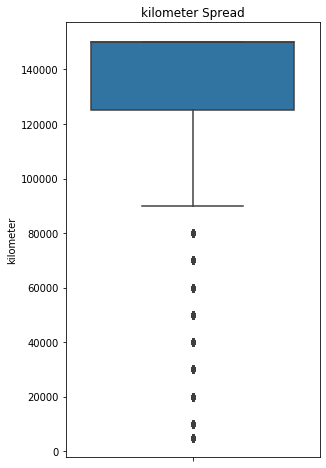

In [33]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
plt.title('kilometer Spread')
sb.boxplot(y=data.kilometer)

plt.show()

Infrance: Range of data sets start from 0 to laks which means both new and old vehicle are for resale.

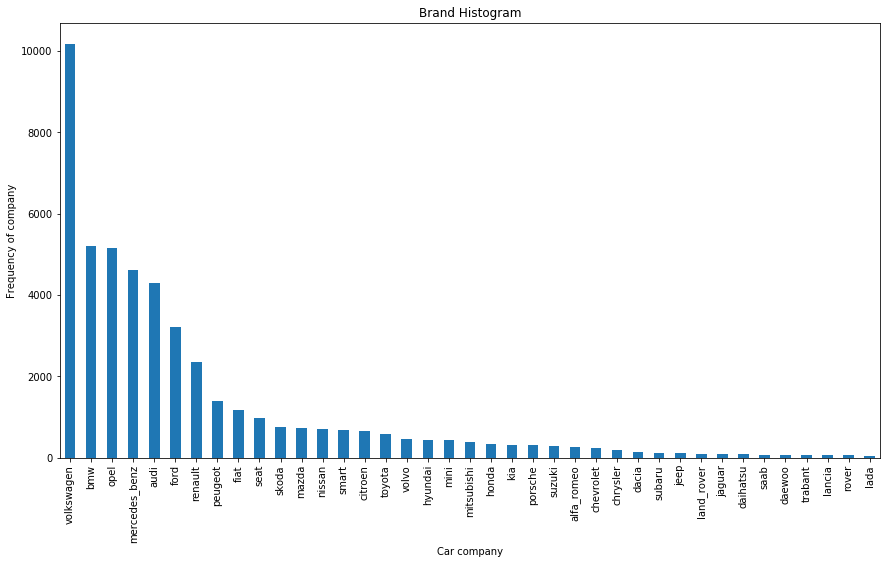

In [34]:
plt.figure(figsize=(50, 8))

plt.subplot(1,3,1)
plt1 = data.brand.value_counts().plot(kind='bar')
plt.title('Brand Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.show()

#### Infrance : this shows most of the people like to buy Volkswagan cars.

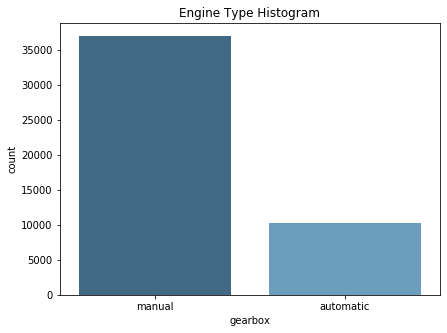

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sb.countplot(data.gearbox, palette=("Blues_d"))

plt.show()

### This shows that resale of malual cars are more as compare to automatic.

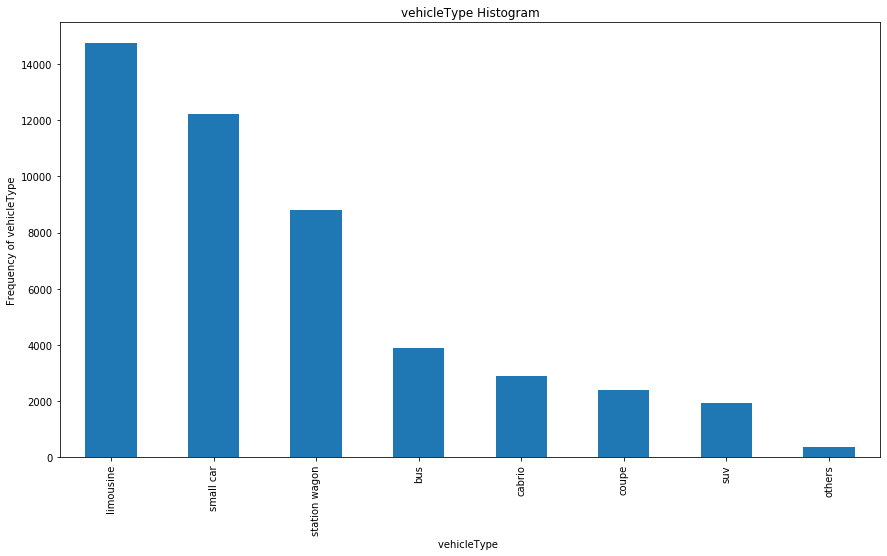

In [36]:
plt.figure(figsize=(50, 8))

plt.subplot(1,3,1)
plt1 = data.vehicleType.value_counts().plot(kind='bar')
plt.title('vehicleType Histogram')
plt1.set(xlabel = 'vehicleType ', ylabel='Frequency of vehicleType')

plt.show()

### This shows that resale of limousine are much heigher then others.

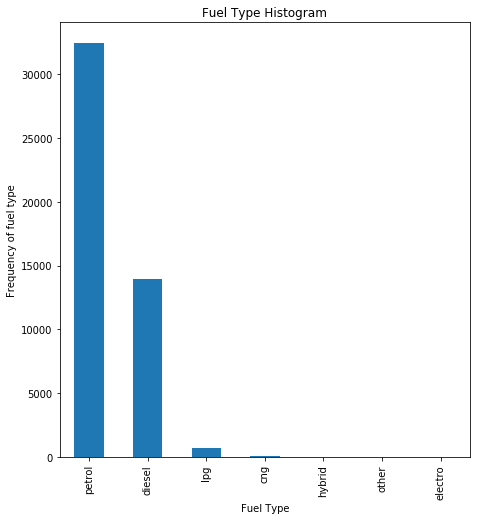

In [37]:
plt.figure(figsize=(25, 8))

plt.subplot(1,3,2)
plt1 = data.fuelType.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.show()

### This show that manual vehicle are more prefiable then automatic gear box

In [38]:
plt.figure(figsize=(800, 80))

plt.subplot(1,3,3)
plt1 = data.model.value_counts().plot(kind='bar')
plt.title('model Type Histogram')
plt1.set(xlabel = 'model Type', ylabel='Frequency of model type')

plt.show()

In [39]:
data["model"].value_counts()

golf          3972
others        3441
3er           2816
polo          1780
corsa         1701
              ... 
elefantino       1
serie_3          1
serie_2          1
b_max            1
rangerover       1
Name: model, Length: 248, dtype: int64

### Infrance : This shows that golf model is high demand in resale as compare to others

In [40]:
data.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

kilometer             0.310889
yearOfRegistration    0.225263
powerPS               0.126900
postalCode            0.054733
reg_month             0.024445
Name: price, dtype: float64

In [41]:
data.corr().loc[:,'price'].abs()

price                 1.000000
yearOfRegistration    0.225263
powerPS               0.126900
kilometer             0.310889
reg_month             0.024445
postalCode            0.054733
Name: price, dtype: float64

In [42]:
data.corr()

,price,yearOfRegistration,powerPS,kilometer,reg_month,postalCode
price,1.000000,0.225263,0.126900,-0.310889,0.024445,0.054733
yearOfRegistration,0.225263,1.000000,0.039369,-0.248866,0.025304,0.021467
powerPS,0.126900,0.039369,1.000000,-0.015928,0.005778,0.009559
kilometer,-0.310889,-0.248866,-0.015928,1.000000,-0.001501,-0.027608
reg_month,0.024445,0.025304,0.005778,-0.001501,1.000000,0.006735
postalCode,0.054733,0.021467,0.009559,-0.027608,0.006735,1.000000


In [43]:
#sb.pairplot(data)

### Bivariate analysis

<Figure size 1080x360 with 0 Axes>

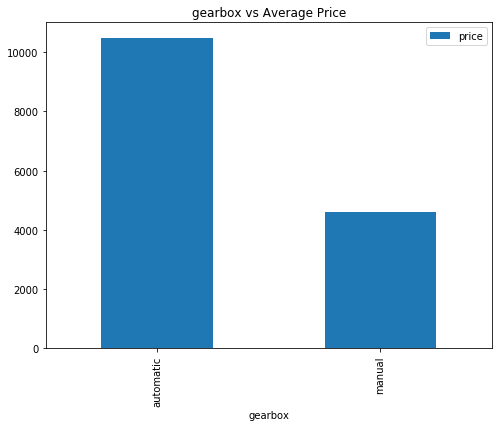

In [44]:
plt.figure(figsize=(15,5))

df = pd.DataFrame(data.groupby(['gearbox'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('gearbox vs Average Price')
plt.show()

- Avrage price of automatic vehicles are more than manual vehicles.

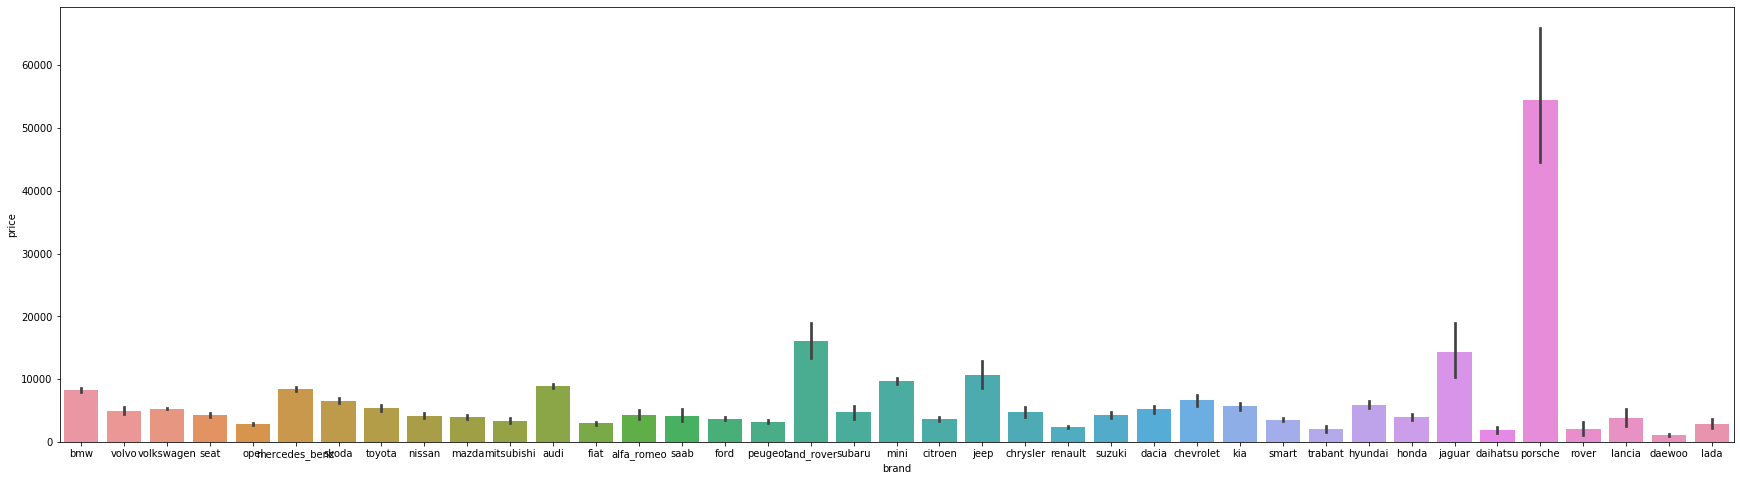

In [45]:
plt.figure(figsize=(30,8))
sb.barplot(data['brand'],data['price'])

- Here price of porche is higher than other vehicles

<Figure size 3600x1080 with 0 Axes>

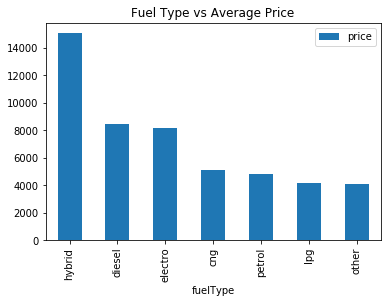

In [46]:
plt.figure(figsize=(50, 15))
df = pd.DataFrame(data.groupby(['fuelType'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

- Avrage price of hybrid vehicle is higher than others.

<Figure size 3600x1080 with 0 Axes>

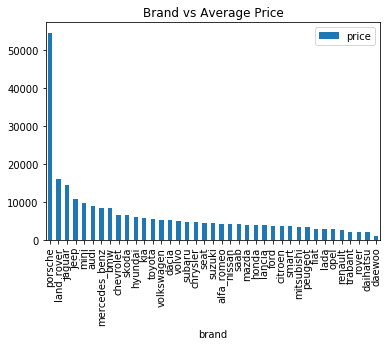

In [47]:
plt.figure(figsize=(50, 15))
df = pd.DataFrame(data.groupby(['brand'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand vs Average Price')
plt.show()

- Avrage price of porche vehicle is higher than others.

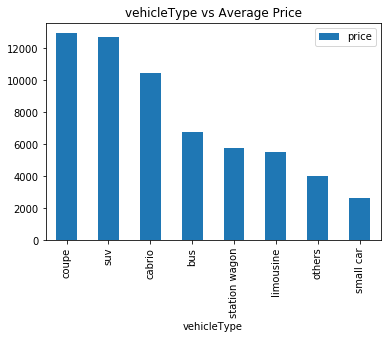

In [48]:
df = pd.DataFrame(data.groupby(['vehicleType'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('vehicleType vs Average Price')
plt.show()

- Avrage price of coupe vehicle is higher than others.

In [49]:
data.groupby(["brand","vehicleType"])["fuelType"].count().reset_index().sort_values(by="fuelType",ascending=False).head(10)

,brand,vehicleType,fuelType
251,volkswagen,limousine,3788
17,bmw,limousine,2822
253,volkswagen,small car,2415
166,opel,small car,2183
132,mercedes_benz,limousine,2141
9,audi,limousine,1892
254,volkswagen,station wagon,1651
12,audi,station wagon,1578
248,volkswagen,bus,1367
76,ford,small car,1305


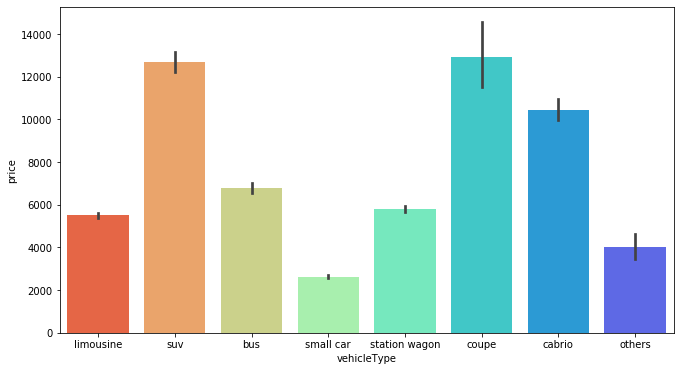

In [50]:
plt.figure(figsize=(11,6))
sb.barplot(x='vehicleType',y="price",data=data,palette='rainbow_r')

- Price of hybrid vehicle is higher than others.

### Corrlation and Heatmap

In [51]:
data.corr(method="spearman")

,price,yearOfRegistration,powerPS,kilometer,reg_month,postalCode
price,1.000000,0.580268,0.533966,-0.386422,0.087748,0.089366
yearOfRegistration,0.580268,1.000000,0.193946,-0.355159,0.024437,0.035198
powerPS,0.533966,0.193946,1.000000,0.030787,0.038988,0.076961
kilometer,-0.386422,-0.355159,0.030787,1.000000,-0.012687,-0.032171
reg_month,0.087748,0.024437,0.038988,-0.012687,1.000000,0.008202
postalCode,0.089366,0.035198,0.076961,-0.032171,0.008202,1.000000


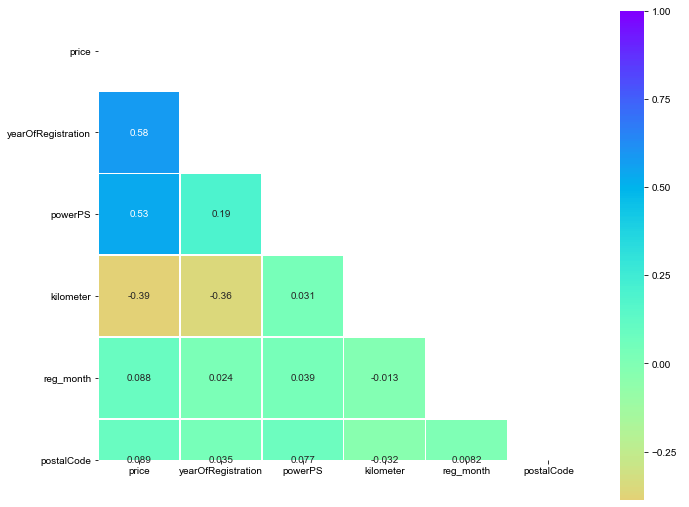

In [52]:
   
corr =data.corr(method='spearman')


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sb.diverging_palette(220, 10, as_cmap=True)


heatmap = sb.heatmap(corr, mask=mask, cmap='rainbow_r', center=0.0,
                      vmax = 1, square=True, linewidths=.5, ax=ax,annot=True)
sb.set_style('white')
plt.savefig('corr-heat.png')
plt.show()


<Figure size 720x432 with 0 Axes>

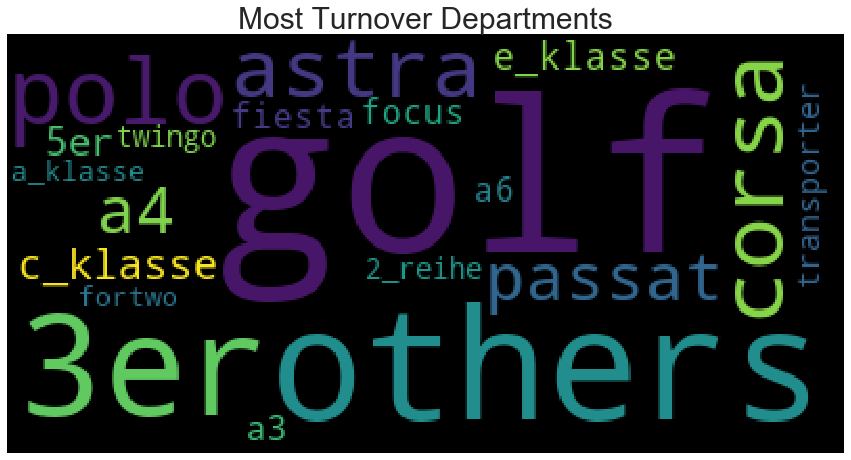

In [53]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in data.model)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=20).generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud)
plt.title('Most Turnover Departments',fontsize = 30)
plt.axis("off")
plt.show()

### Multivariate

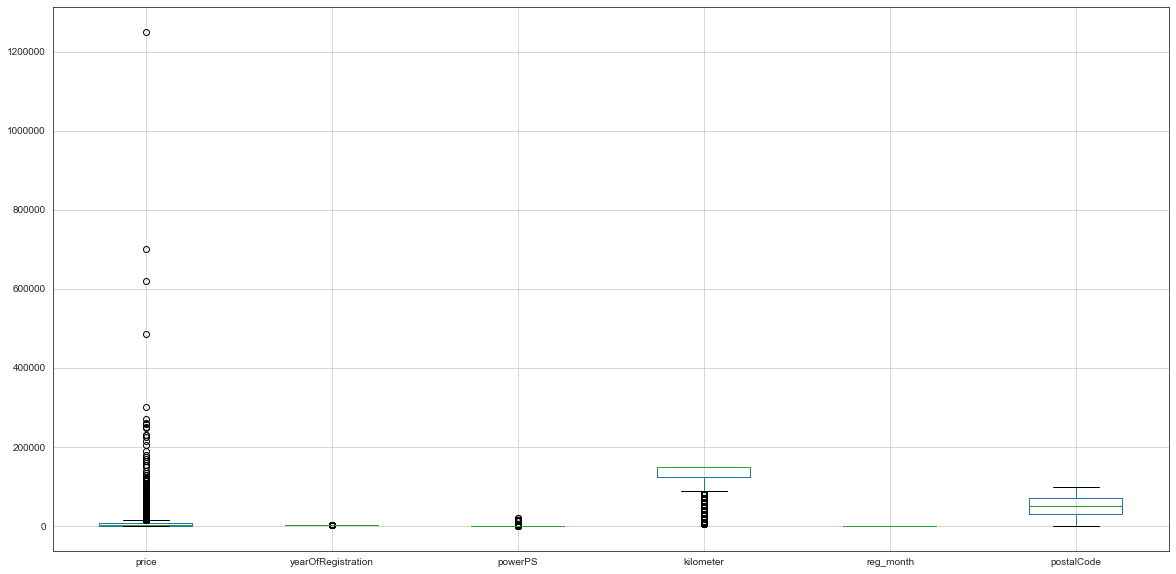

In [54]:
plt.figure(figsize=(20, 10))
data.boxplot()

### 1st assumption:
#### Applying ANOVA between gearbox and price:

#### NULL HYPOTHESIS: Mean price for manual transmission=Mean price for automatic transmission.
#### ALTERNATE HYPOTHESIS: Mean price for manual transmission is not equal to Mean price for automatic transmission.

In [55]:
f_oneway(data[data['gearbox']=='manual']['price'],data[data['gearbox']=='automatic']['price'])

F_onewayResult(statistic=2129.3759166963555, pvalue=0.0)

#### p value < 0.05,therefore null hypothesis is rejected, ie, means are not equal
#### This means that price is depending on the type of the gearbox
#### manual  will get low and automatic we will get high 
# 3rd assumption:
### Applying ANOVA between notRepairedDamage and price
### NULL HYPOTHESIS: Mean price for repairing done=Mean price for repairing not done
### ALTERNATE HYPOTHESIS: Mean price for repairing done is not equal to Mean price for repairing not done


#### p value <0.05 means that null hypotheses is rejected which means that the mean price of car when 
#### it is repaired is not equal to the mean price of the car when it is not repaired.
#### This means that price is depending on the repairing

In [56]:
f_oneway(data[data["notRepairedDamage"]=='no']['price'],data[data['notRepairedDamage']=='yes']['price'])

F_onewayResult(statistic=550.3887998840012, pvalue=5.114218916891571e-121)

# Checking dependency between independent variables, using CHI Square Test:

# NULL HYPOTHESES: Fuel type and gearbox are independent
# ALTERNATE HYPOTHESES: Fuel type and gearbox are dependent

In [57]:
table=pd.crosstab(index=data['fuelType'],columns=data['gearbox'])
chi2_contingency(table)

(1420.7572085526003,
 7.756477932364911e-304,
 6,
 array([[1.70849226e+01, 6.19150774e+01],
        [3.01819216e+03, 1.09378078e+04],
        [2.81144297e+00, 1.01885570e+01],
        [7.56926952e+00, 2.74307305e+01],
        [1.55926952e+02, 5.65073048e+02],
        [2.81144297e+00, 1.01885570e+01],
        [7.01260381e+03, 2.54133962e+04]]))

# fuel type we willl dele
# p value is 0<0.05, so null hypotheses is rejected,ie fueltype 
# and the gearbox are related to each other so we can 'DROP' any one from 2.

In [58]:
table1=pd.crosstab(index=data['brand'],columns=data['vehicleType'])
a,p,df,arr=chi2_contingency(table1)
p

0.0

#### p value<0.05, therefore brand and vehicle depends on each other

# Checking correlation between powerPS and price

In [59]:
data[['powerPS','price']].corr()

,powerPS,price
powerPS,1.0000,0.1269
price,0.1269,1.0000


#### price is also depending on the power of the cars corr range is -1 to 1 if its nearto
#### near to o no linearly corelation
#### 1 positively highely corelated
##### 0.02price which is nearly to 0 

In [30]:
# Code to check no. of outliers in each column
data_num=data._get_numeric_data()
def outlier(data_num,col):
    for i in col:
        count=0
        for j in data_num[i]:
            q1=data_num[i].quantile(0.25)
            q3=data_num[i].quantile(0.75)
            iqr=q3-q1
            lim1=q1-1.5*iqr
            lim2=q3+1.5*iqr
            if j>lim2 or j<lim1:
                count+=1
        print('column name:',i,'No of outliers: ',count)
col=data_num.columns
outlier(data_num,col)

column name: price No of outliers:  3543
column name: yearOfRegistration No of outliers:  724
column name: powerPS No of outliers:  1640
column name: kilometer No of outliers:  8098
column name: reg_month No of outliers:  0
column name: postalCode No of outliers:  0


In [24]:
def get_lower_upper_bound(data):
    # Get first and third quartile
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate Interquartile range
    iqr = q3 - q1
    
    # Compute lower and upper bound
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return lower_bound, upper_bound

In [25]:
def get_outliers_iqr(my_data):
    lower_bound, upper_bound = get_lower_upper_bound(my_data)
    # Filter data less than lower bound and more than upper bound
    return my_data[np.where((my_data > upper_bound) |
                            (my_data < lower_bound))]

In [26]:
get_lower_upper_bound(data.price)

(-7950.0, 16450.0)

In [27]:
get_lower_upper_bound(data.yearOfRegistration)

(1985.5, 2021.5)

In [28]:
data_num=data._get_numeric_data()           #To store numeric data in a variable
cols=data_num.columns

In [29]:
# Checking No.of outliers in each columns
ls=[]
for i in data_num.columns:
    ls.append(len(get_outliers_iqr(data[i].values)))
df=pd.DataFrame(columns=['Column_names','No_of_outliers'])
df['Column_names']=data_num.columns
df['No_of_outliers']=ls
df

,Column_names,No_of_outliers
0,price,3543
1,yearOfRegistration,724
2,powerPS,1640
3,kilometer,8098
4,reg_month,0
5,postalCode,0


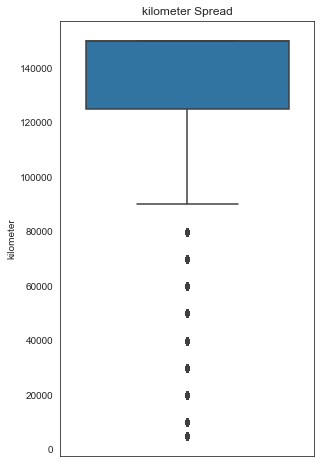

In [66]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
plt.title('kilometer Spread')
sb.boxplot(y=data.kilometer)

plt.show()

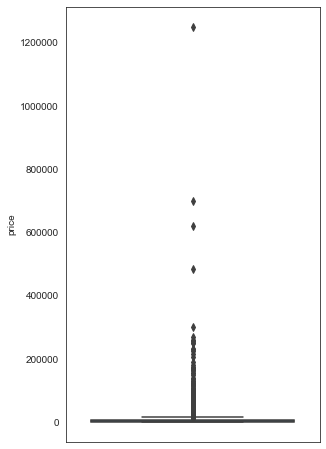

In [67]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
sb.boxplot(y=data.price)

plt.show()

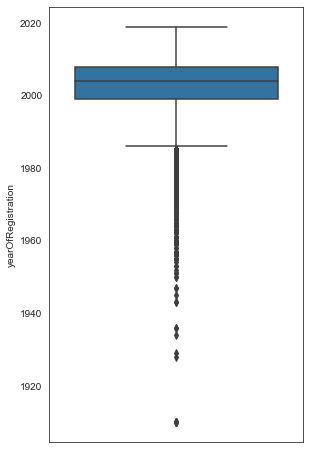

In [68]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
sb.boxplot(y=data.yearOfRegistration)

plt.show()

In [69]:
get_lower_upper_bound(data.kilometer)

(87500.0, 187500.0)

In [70]:
km_mean=int(data['kilometer'].mean())
km_mean

125956

In [71]:
data['kilometer']=np.where(data['kilometer'] <87500.0, km_mean,data['kilometer'])

In [72]:
get_lower_upper_bound(data.kilometer)

(89890.0, 186066.0)

In [73]:
len(get_outliers_iqr(data.kilometer.values))

0

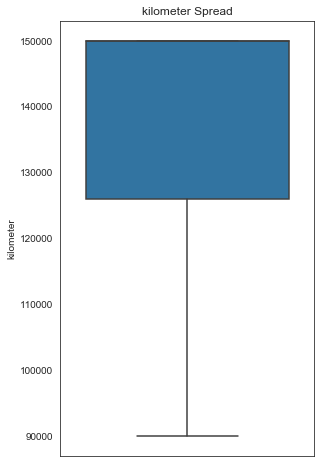

In [74]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
plt.title('kilometer Spread')
sb.boxplot(y=data.kilometer)

plt.show()

In [75]:
#checking lower and upper bound
get_lower_upper_bound(data.powerPS)

(-20.0, 252.0)

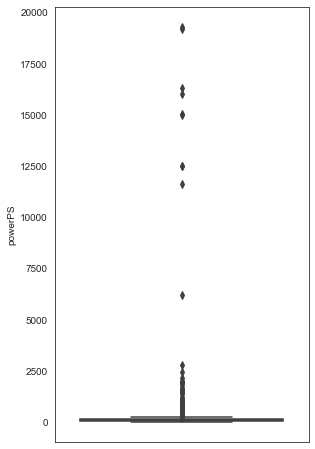

In [76]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
sb.boxplot(y=data.powerPS)

plt.show()

In [77]:
data=data[data['powerPS']<252]

In [78]:
get_lower_upper_bound(data.yearOfRegistration)

(1985.5, 2021.5)

In [79]:
yr_mean=data.yearOfRegistration.mean()
yr_mean

2003.4292817022006

In [80]:
# data['price']=data['price'].replace(range(14950,1300000),data['price'].mean())

In [81]:
data['yearOfRegistration']=np.where(data['yearOfRegistration'] <1985.6, yr_mean,data['yearOfRegistration'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


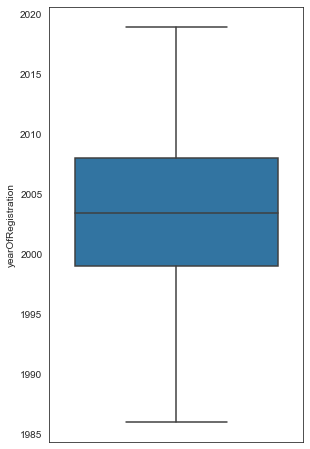

In [82]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,2)
sb.boxplot(y=data.yearOfRegistration)

plt.show()

brand_stats = data.groupby('brand')['brand'].agg('count').sort_values(ascending = False)
brand_stats_less_than_960 = brand_stats[brand_stats <= 960]

data.brand = data.brand.apply(lambda x:'other' if x in brand_stats_less_than_960 else x)
data.brand.unique()

model_stats = data.groupby('model')['model'].agg('count').sort_values(ascending = False)
model_stats_less_than_998=model_stats[model_stats <=998]
model_stats_less_than_998

data.model = data.model.apply(lambda x:'other' if x in model_stats_less_than_998 else x)
data.model.unique()

In [83]:
data1= data._get_numeric_data()
data1=data1.drop(['postalCode','reg_month'],axis=1)
data1

,price,yearOfRegistration,powerPS,kilometer
0,4450.0,2003.0,150.000000,150000
1,13299.0,2005.0,163.000000,150000
2,3200.0,2003.0,101.000000,150000
3,4500.0,2006.0,86.000000,125956
4,18750.0,2008.0,185.000000,150000
...,...,...,...,...
49996,0.0,2005.0,99.457163,150000
49997,19999.0,1990.0,99.457163,125956
49998,0.0,2004.0,171.687524,150000
49999,100.0,2000.0,76.431655,150000


In [84]:
#sc = StandardScaler()
#data2= pd.DataFrame(sc.fit_transform(data1))
#data2.columns=data1.columns
#print(data2)

In [85]:
num_motors_data11=data1.join(data[["vehicleType","gearbox","fuelType","brand",'model']])

In [86]:
data.mtor_name.nunique()

34945

In [87]:
motor_dummies=pd.get_dummies(data=num_motors_data11,drop_first=True)
motor_dummies

,price,yearOfRegistration,powerPS,kilometer,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira
0,4450.0,2003.0,150.000000,150000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13299.0,2005.0,163.000000,150000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3200.0,2003.0,101.000000,150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4500.0,2006.0,86.000000,125956,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,18750.0,2008.0,185.000000,150000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.0,2005.0,99.457163,150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,19999.0,1990.0,99.457163,125956,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0.0,2004.0,171.687524,150000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49999,100.0,2000.0,76.431655,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X= motor_dummies.iloc[:,1:]
#print(len(X))

In [89]:
Y= motor_dummies.iloc[:,0]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [91]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X,Y)
print(linreg.intercept_)

-624471.8438566069


In [92]:
# Y Prediction
Y_pred1 = linreg.predict(X_test)


# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred1))
r2 = r2_score(Y_test, Y_pred1)
print('RMSE=', rmse)
print('r2=', r2)

RMSE= 4591.733727038267
r2= 0.545936952562712


In [93]:
# R-square value on train data
Y_pred_train = linreg.predict(X_train)
r2_train = r2_score(Y_train, Y_pred_train)
r2_train

0.5604629829605572

Text(0.5, 1.0, 'Residual plot')

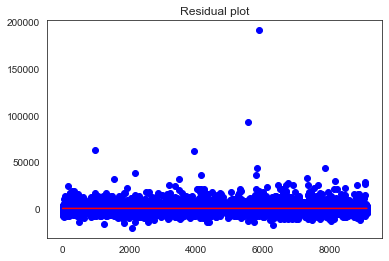

In [94]:
#residual plot
x=[i for i in range(1, len(Y_pred1)+1)]
x_plot = plt.scatter(x, (Y_test-Y_pred1), c='b')
plt.plot(x,[0]*len(Y_pred1),c='r')
plt.title('Residual plot')

In [95]:
Y_pred = linreg.predict(X_test)
print(linreg.score(X_test,Y_test)*100)

54.593695256271204


In [96]:
import statsmodels.api as sm

In [97]:
x_incl_const=sm.add_constant(X_train)   #A column of 1,1,1...1 is added to starting of data set to get Xo(x0) which is 1 we get a0 with help of x0
model=sm.OLS(Y_train,x_incl_const)
results=model.fit()
#results.params             
#results.pvalues
x_incl_const               # A column of 1,1,1...1 is added to starting of data set to get Xo(x0) which is 1 we get a0 with help of x0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,yearOfRegistration,powerPS,kilometer,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira
38789,1.0,2002.0,110.000000,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11046,1.0,2001.0,129.000000,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44985,1.0,2000.0,60.000000,125956,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34167,1.0,2007.0,125.000000,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3002,1.0,2001.0,50.000000,125956,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33351,1.0,1997.0,105.013761,150000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23304,1.0,2003.0,120.000000,150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46743,1.0,2000.0,50.000000,90000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47787,1.0,2011.0,116.000000,90000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
p_val=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
grt=p_val[p_val['p-values']>0.05]
ls=list(grt.index)

In [99]:
x_incl_const=x_incl_const.drop(columns=ls,axis=1)
x_incl_const

,const,yearOfRegistration,powerPS,kilometer,vehicleType_cabrio,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,gearbox_manual,...,model_twingo,model_v60,model_viano,model_vito,model_wrangler,model_x_type,model_xc_reihe,model_yeti,model_z_reihe,model_zafira
38789,1.0,2002.0,110.000000,150000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11046,1.0,2001.0,129.000000,150000,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
44985,1.0,2000.0,60.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
34167,1.0,2007.0,125.000000,150000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3002,1.0,2001.0,50.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33351,1.0,1997.0,105.013761,150000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23304,1.0,2003.0,120.000000,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46743,1.0,2000.0,50.000000,90000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
47787,1.0,2011.0,116.000000,90000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [100]:
model=sm.OLS(Y_train,x_incl_const)
results=model.fit()
#results.params             
#results.pvalues
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     387.9
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        19:47:23   Log-Likelihood:            -3.5776e+05
No. Observations:               36472   AIC:                         7.157e+05
Df Residuals:                   36358   BIC:                         7.167e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.673e+05   8134.075    -82.040      0.000   -6.83e+05   -6.51e+05
yearOfRegistration          339.0165      4.041     83.884      0.000     331.095     346.938
powerPS                      41.7354      0.776     53.799      0.000      40.215      43.256
kilometer                    -0.0825      0.002    -54.538      0.000      -0.085      -0.080
vehicleType_cabrio         1069.0503    124.012      8.621      0.000     825.983    1312.118
vehicleType_limousine     -1772.6879     81.635    -21.715      0.000   -1932.694   -1612.682
vehicleType_others        -1050.0677    260.892     -4.025      0.000   -1561.423    -538.713
vehicleType_small car     -1415.9886     91.358    -15.499      0.000   -1595.052   -1236.925
vehicleType_station wagon -1053.5953     89.071    -11.829      0.000   -1228.177    -879.014
gearbox_manual            -1117.3484     66.724    -16.746      0.000   -1248.129    -986.568
fuelType_hybrid            6395.8064    895.995      7.138      0.000    4639.630    8151.983
fuelType_lpg              -1338.5326    196.156     -6.824      0.000   -1723.005    -954.060
brand_audi                 2309.6652    109.007     21.188      0.000    2096.008    2523.322
brand_bmw                  8584.5242    281.243     30.524      0.000    8033.281    9135.768
brand_hyundai             -2106.1748    429.491     -4.904      0.000   -2947.990   -1264.359
brand_jaguar               1.715e+04   1186.357     14.454      0.000    1.48e+04    1.95e+04
brand_jeep                 2395.4493    767.922      3.119      0.002     890.300    3900.598
brand_kia                 -2998.1514    480.980     -6.233      0.000   -3940.886   -2055.417
brand_land_rover           1.542e+04    823.462     18.724      0.000    1.38e+04     1.7e+04
brand_mercedes_benz        2425.1338    112.776     21.504      0.000    2204.089    2646.179
brand_mini                 3278.5409    249.686     13.131      0.000    2789.150    3767.932
brand_opel                  820.8738     93.406      8.788      0.000     637.796    1003.951
brand_porsche              3516.7244    723.710      4.859      0.000    2098.231    4935.218
brand_saab                -2486.1765    645.674     -3.851      0.000   -3751.716   -1220.636
brand_toyota               1004.2632    217.336      4.621      0.000     578.278    1430.248
brand_trabant              4786.7827    592.030      8.085      0.000    3626.388    5947.178
brand_volkswagen           2108.9413     77.090     27.357      0.000    1957.843    2260.040
model_1_reihe              1232.4466    396.691      3.107      0.002     454.921    2009.972
model_1er                 -4552.5615    347.414    -13.104      0.000   -5233.503   -3871.620
model_2_reihe              -236.3512    203.809     -1.160      0.246    -6

In [101]:
p_val=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
grt=p_val[p_val['p-values']>0.05]
ls=list(grt.index)

In [102]:
x_incl_const=x_incl_const.drop(columns=ls,axis=1)
x_incl_const

,const,yearOfRegistration,powerPS,kilometer,vehicleType_cabrio,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,gearbox_manual,...,model_twingo,model_v60,model_viano,model_vito,model_wrangler,model_x_type,model_xc_reihe,model_yeti,model_z_reihe,model_zafira
38789,1.0,2002.0,110.000000,150000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11046,1.0,2001.0,129.000000,150000,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
44985,1.0,2000.0,60.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
34167,1.0,2007.0,125.000000,150000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3002,1.0,2001.0,50.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33351,1.0,1997.0,105.013761,150000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23304,1.0,2003.0,120.000000,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46743,1.0,2000.0,50.000000,90000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
47787,1.0,2011.0,116.000000,90000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [103]:
model=sm.OLS(Y_train,x_incl_const)
results=model.fit()
#results.params             
#results.pvalues
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     429.3
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        19:47:23   Log-Likelihood:            -3.5777e+05
No. Observations:               36472   AIC:                         7.157e+05
Df Residuals:                   36369   BIC:                         7.166e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.672e+05   8128.828    -82.080      0.000   -6.83e+05   -6.51e+05
yearOfRegistration          338.9910      4.039     83.934      0.000     331.075     346.907
powerPS                      41.8699      0.774     54.079      0.000      40.352      43.387
kilometer                    -0.0826      0.002    -54.615      0.000      -0.086      -0.080
vehicleType_cabrio         1029.5085    122.682      8.392      0.000     789.048    1269.969
vehicleType_limousine     -1783.3135     81.252    -21.948      0.000   -1942.570   -1624.057
vehicleType_others        -1058.2555    260.886     -4.056      0.000   -1569.600    -546.911
vehicleType_small car     -1439.9687     90.723    -15.872      0.000   -1617.788   -1262.150
vehicleType_station wagon -1076.7803     88.707    -12.139      0.000   -1250.649    -902.912
gearbox_manual            -1119.9653     66.636    -16.807      0.000   -1250.573    -989.357
fuelType_hybrid            6401.4242    896.183      7.143      0.000    4644.880    8157.969
fuelType_lpg              -1321.1626    196.098     -6.737      0.000   -1705.520    -936.806
brand_audi                 2267.2353    107.435     21.103      0.000    2056.660    2477.811
brand_bmw                  8531.2026    280.697     30.393      0.000    7981.028    9081.377
brand_hyundai             -1717.3606    373.067     -4.603      0.000   -2448.583    -986.138
brand_jaguar               1.714e+04   1186.545     14.448      0.000    1.48e+04    1.95e+04
brand_jeep                 2385.9884    768.065      3.106      0.002     880.559    3891.417
brand_kia                 -3022.0155    480.929     -6.284      0.000   -3964.651   -2079.380
brand_land_rover           1.536e+04    823.410     18.650      0.000    1.37e+04     1.7e+04
brand_mercedes_benz        2381.2413    111.459     21.364      0.000    2162.778    2599.705
brand_mini                 3245.2876    248.743     13.047      0.000    2757.744    3732.831
brand_opel                  787.5301     91.524      8.605      0.000     608.141     966.920
brand_porsche              3501.3140    723.560      4.839      0.000    2083.116    4919.512
brand_saab                -2482.4716    645.675     -3.845      0.000   -3748.014   -1216.929
brand_toyota                971.1519    216.735      4.481      0.000     546.346    1395.958
brand_trabant              4766.6026    591.933      8.053      0.000    3606.396    5926.809
brand_volkswagen           2070.5828     74.788     27.686      0.000    1923.997    2217.169
model_1_reihe              1205.3029    396.281      3.042      0.002     428.580    1982.026
model_1er                 -4547.6766    347.434    -13.089      0.000   -5228.657   -3866.696
model_3_reihe               434.4773    230.992      1.881      0.060     -

In [104]:
p_val=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
grt=p_val[p_val['p-values']>0.05]
ls=list(grt.index)
x_incl_const=x_incl_const.drop(columns=ls,axis=1)
x_incl_const

,const,yearOfRegistration,powerPS,kilometer,vehicleType_cabrio,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,gearbox_manual,...,model_twingo,model_v60,model_viano,model_vito,model_wrangler,model_x_type,model_xc_reihe,model_yeti,model_z_reihe,model_zafira
38789,1.0,2002.0,110.000000,150000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11046,1.0,2001.0,129.000000,150000,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
44985,1.0,2000.0,60.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
34167,1.0,2007.0,125.000000,150000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3002,1.0,2001.0,50.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33351,1.0,1997.0,105.013761,150000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23304,1.0,2003.0,120.000000,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46743,1.0,2000.0,50.000000,90000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
47787,1.0,2011.0,116.000000,90000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [105]:
model=sm.OLS(Y_train,x_incl_const)
results=model.fit()
#results.params             
#results.pvalues
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     433.5
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        19:47:24   Log-Likelihood:            -3.5777e+05
No. Observations:               36472   AIC:                         7.158e+05
Df Residuals:                   36370   BIC:                         7.166e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.671e+05   8128.684    -82.062      0.000   -6.83e+05   -6.51e+05
yearOfRegistration          338.9195      4.039     83.917      0.000     331.003     346.836
powerPS                      41.8844      0.774     54.098      0.000      40.367      43.402
kilometer                    -0.0826      0.002    -54.606      0.000      -0.086      -0.080
vehicleType_cabrio         1039.8751    122.563      8.484      0.000     799.649    1280.101
vehicleType_limousine     -1773.9479     81.102    -21.873      0.000   -1932.911   -1614.985
vehicleType_others        -1052.5084    260.878     -4.034      0.000   -1563.836    -541.181
vehicleType_small car     -1441.8751     90.720    -15.894      0.000   -1619.689   -1264.061
vehicleType_station wagon -1070.0264     88.637    -12.072      0.000   -1243.758    -896.294
gearbox_manual            -1116.1412     66.607    -16.757      0.000   -1246.693    -985.590
fuelType_hybrid            6401.3553    896.214      7.143      0.000    4644.749    8157.961
fuelType_lpg              -1323.8959    196.099     -6.751      0.000   -1708.256    -939.536
brand_audi                 2239.9443    106.454     21.041      0.000    2031.290    2448.598
brand_bmw                  8509.7259    280.475     30.340      0.000    7959.988    9059.464
brand_hyundai             -1725.8744    373.053     -4.626      0.000   -2457.068    -994.680
brand_jaguar               1.713e+04   1186.565     14.437      0.000    1.48e+04    1.95e+04
brand_jeep                 2384.6381    768.091      3.105      0.002     879.157    3890.119
brand_kia                 -3035.1436    480.896     -6.311      0.000   -3977.713   -2092.574
brand_land_rover           1.534e+04    823.374     18.627      0.000    1.37e+04     1.7e+04
brand_mercedes_benz        2357.1882    110.727     21.288      0.000    2140.160    2574.216
brand_mini                 3224.1659    248.498     12.975      0.000    2737.103    3711.229
brand_opel                  765.3555     90.765      8.432      0.000     587.454     943.257
brand_porsche              3481.1811    723.506      4.812      0.000    2063.089    4899.273
brand_saab                -2497.6081    645.648     -3.868      0.000   -3763.096   -1232.120
brand_toyota                951.8352    216.499      4.396      0.000     527.491    1376.179
brand_trabant              4741.4521    591.803      8.012      0.000    3581.501    5901.403
brand_volkswagen           2045.8883     73.629     27.787      0.000    1901.574    2190.203
model_1_reihe              1186.6946    396.171      2.995      0.003     410.187    1963.202
model_1er                 -4554.4713    347.427    -13.109      0.000   -5235.439   -3873.503
model_3er                 -7245.6264    288.706    -25.097      0.000   -78

In [106]:
p_val=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
grt=p_val[p_val['p-values']>0.05]
ls=list(grt.index)
x_incl_const=x_incl_const.drop(columns=ls,axis=1)
x_incl_const

,const,yearOfRegistration,powerPS,kilometer,vehicleType_cabrio,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,gearbox_manual,...,model_twingo,model_v60,model_viano,model_vito,model_wrangler,model_x_type,model_xc_reihe,model_yeti,model_z_reihe,model_zafira
38789,1.0,2002.0,110.000000,150000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11046,1.0,2001.0,129.000000,150000,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
44985,1.0,2000.0,60.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
34167,1.0,2007.0,125.000000,150000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3002,1.0,2001.0,50.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33351,1.0,1997.0,105.013761,150000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23304,1.0,2003.0,120.000000,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46743,1.0,2000.0,50.000000,90000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
47787,1.0,2011.0,116.000000,90000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
model=sm.OLS(Y_train,x_incl_const)
results=model.fit()
#results.params             
#results.pvalues
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     433.5
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        19:47:24   Log-Likelihood:            -3.5777e+05
No. Observations:               36472   AIC:                         7.158e+05
Df Residuals:                   36370   BIC:                         7.166e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.671e+05   8128.684    -82.062      0.000   -6.83e+05   -6.51e+05
yearOfRegistration          338.9195      4.039     83.917      0.000     331.003     346.836
powerPS                      41.8844      0.774     54.098      0.000      40.367      43.402
kilometer                    -0.0826      0.002    -54.606      0.000      -0.086      -0.080
vehicleType_cabrio         1039.8751    122.563      8.484      0.000     799.649    1280.101
vehicleType_limousine     -1773.9479     81.102    -21.873      0.000   -1932.911   -1614.985
vehicleType_others        -1052.5084    260.878     -4.034      0.000   -1563.836    -541.181
vehicleType_small car     -1441.8751     90.720    -15.894      0.000   -1619.689   -1264.061
vehicleType_station wagon -1070.0264     88.637    -12.072      0.000   -1243.758    -896.294
gearbox_manual            -1116.1412     66.607    -16.757      0.000   -1246.693    -985.590
fuelType_hybrid            6401.3553    896.214      7.143      0.000    4644.749    8157.961
fuelType_lpg              -1323.8959    196.099     -6.751      0.000   -1708.256    -939.536
brand_audi                 2239.9443    106.454     21.041      0.000    2031.290    2448.598
brand_bmw                  8509.7259    280.475     30.340      0.000    7959.988    9059.464
brand_hyundai             -1725.8744    373.053     -4.626      0.000   -2457.068    -994.680
brand_jaguar               1.713e+04   1186.565     14.437      0.000    1.48e+04    1.95e+04
brand_jeep                 2384.6381    768.091      3.105      0.002     879.157    3890.119
brand_kia                 -3035.1436    480.896     -6.311      0.000   -3977.713   -2092.574
brand_land_rover           1.534e+04    823.374     18.627      0.000    1.37e+04     1.7e+04
brand_mercedes_benz        2357.1882    110.727     21.288      0.000    2140.160    2574.216
brand_mini                 3224.1659    248.498     12.975      0.000    2737.103    3711.229
brand_opel                  765.3555     90.765      8.432      0.000     587.454     943.257
brand_porsche              3481.1811    723.506      4.812      0.000    2063.089    4899.273
brand_saab                -2497.6081    645.648     -3.868      0.000   -3763.096   -1232.120
brand_toyota                951.8352    216.499      4.396      0.000     527.491    1376.179
brand_trabant              4741.4521    591.803      8.012      0.000    3581.501    5901.403
brand_volkswagen           2045.8883     73.629     27.787      0.000    1901.574    2190.203
model_1_reihe              1186.6946    396.171      2.995      0.003     410.187    1963.202
model_1er                 -4554.4713    347.427    -13.109      0.000   -5235.439   -3873.503
model_3er                 -7245.6264    288.706    -25.097      0.000   -78

In [108]:
p_val=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
grt=p_val[p_val['p-values']>0.05]
ls=list(grt.index)
x_incl_const=x_incl_const.drop(columns=ls,axis=1)
x_incl_const

,const,yearOfRegistration,powerPS,kilometer,vehicleType_cabrio,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,gearbox_manual,...,model_twingo,model_v60,model_viano,model_vito,model_wrangler,model_x_type,model_xc_reihe,model_yeti,model_z_reihe,model_zafira
38789,1.0,2002.0,110.000000,150000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11046,1.0,2001.0,129.000000,150000,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
44985,1.0,2000.0,60.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
34167,1.0,2007.0,125.000000,150000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3002,1.0,2001.0,50.000000,125956,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33351,1.0,1997.0,105.013761,150000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23304,1.0,2003.0,120.000000,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
46743,1.0,2000.0,50.000000,90000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
47787,1.0,2011.0,116.000000,90000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
